# Strong business tester

This notebook tries to test if a business is strong based on some financial parameters:

* Strong free cash flow
* Strong balance sheet

In [1]:
import matplotlib.pyplot as plt

In [2]:
from yahooquery import Ticker

In [3]:
ticker = Ticker('blk')

## Cash flow analysis

In [4]:
cash_flow = ticker.cash_flow()

In [5]:
type(cash_flow)

pandas.core.frame.DataFrame

In [6]:
cash_flow.columns

Index(['asOfDate', 'periodType', 'currencyCode', 'BeginningCashPosition',
       'CapitalExpenditure', 'CashDividendsPaid',
       'CashFlowFromContinuingFinancingActivities',
       'CashFlowFromContinuingInvestingActivities',
       'CashFlowFromContinuingOperatingActivities',
       'ChangeInCashSupplementalAsReported', 'ChangeInOtherCurrentAssets',
       'ChangeInOtherCurrentLiabilities', 'ChangeInOtherWorkingCapital',
       'ChangeInPayablesAndAccruedExpense', 'ChangeInReceivables',
       'ChangeInWorkingCapital', 'ChangesInAccountReceivables',
       'ChangesInCash', 'CommonStockDividendPaid', 'CommonStockPayments',
       'DeferredIncomeTax', 'DeferredTax', 'DepreciationAmortizationDepletion',
       'DepreciationAndAmortization', 'DividendReceivedCFO',
       'DividendsReceivedCFI', 'EarningsLossesFromEquityInvestments',
       'EffectOfExchangeRateChanges', 'EndCashPosition', 'FinancingCashFlow',
       'FreeCashFlow', 'GainLossOnInvestmentSecurities',
       'IncomeTaxPaid

In [7]:
cash_flow[['asOfDate', 'FreeCashFlow']].style.format({
    'FreeCashFlow': '{:,.2f}'.format,
})

,asOfDate,FreeCashFlow
symbol,,
blk,2019-12-31 00:00:00,"2,630,000,000.00"
blk,2020-12-31 00:00:00,"3,549,000,000.00"
blk,2021-12-31 00:00:00,"4,603,000,000.00"
blk,2022-12-31 00:00:00,"4,423,000,000.00"
blk,2022-12-31 00:00:00,"4,423,000,000.00"


### Free cash flow

In [8]:
free_cash_flow = cash_flow[['asOfDate', 'FreeCashFlow']]
free_cash_flow = free_cash_flow.set_index('asOfDate')

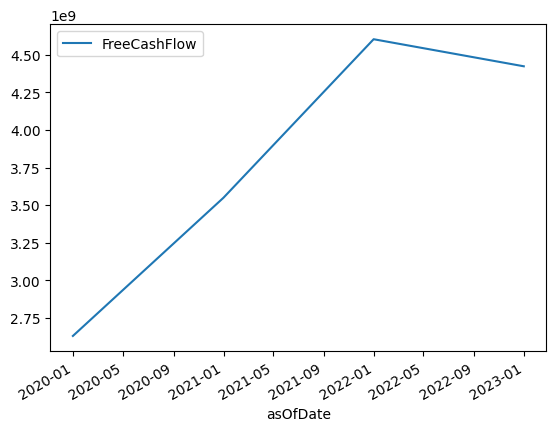

In [9]:
free_cash_flow.plot();

## Balance sheet analysis

In [10]:
balance_sheet = ticker.balance_sheet(frequency='Quarterly')

In [11]:
type(balance_sheet)

pandas.core.frame.DataFrame

In [12]:
balance_sheet.columns

Index(['asOfDate', 'periodType', 'currencyCode', 'AccountsReceivable',
       'AccumulatedDepreciation', 'AdditionalPaidInCapital',
       'BuildingsAndImprovements', 'CapitalLeaseObligations', 'CapitalStock',
       'CashAndCashEquivalents', 'CashCashEquivalentsAndShortTermInvestments',
       'CommonStock', 'CommonStockEquity', 'ConstructionInProgress',
       'CurrentAssets', 'CurrentLiabilities', 'EmployeeBenefits',
       'GainsLossesNotAffectingRetainedEarnings', 'Goodwill',
       'GoodwillAndOtherIntangibleAssets', 'GrossPPE', 'InvestedCapital',
       'InvestmentsAndAdvances', 'LandAndImprovements', 'Leases',
       'LongTermCapitalLeaseObligation', 'LongTermDebt',
       'LongTermDebtAndCapitalLeaseObligation', 'MachineryFurnitureEquipment',
       'MinorityInterest', 'NetDebt', 'NetPPE', 'NetTangibleAssets',
       'NonCurrentDeferredLiabilities', 'NonCurrentDeferredTaxesLiabilities',
       'OrdinarySharesNumber', 'OtherIntangibleAssets',
       'OtherNonCurrentAssets', 'Ot

### Debt vs Equity

In [13]:
debt_vs_equity = balance_sheet[['asOfDate', 'TotalDebt', 'CommonStockEquity']]
debt_vs_equity = debt_vs_equity.set_index('asOfDate')

In [14]:
debt_vs_equity.style.format({
    'TotalDebt': '{:,.2f}'.format,    
    'CommonStockEquity': '{:,.2f}'.format,
})

,TotalDebt,CommonStockEquity
asOfDate,,
2022-03-31 00:00:00,"9,272,000,000.00","37,489,000,000.00"
2022-06-30 00:00:00,"8,450,000,000.00","37,089,000,000.00"
2022-09-30 00:00:00,"8,364,000,000.00","37,162,000,000.00"
2022-12-31 00:00:00,"8,489,000,000.00","37,744,000,000.00"


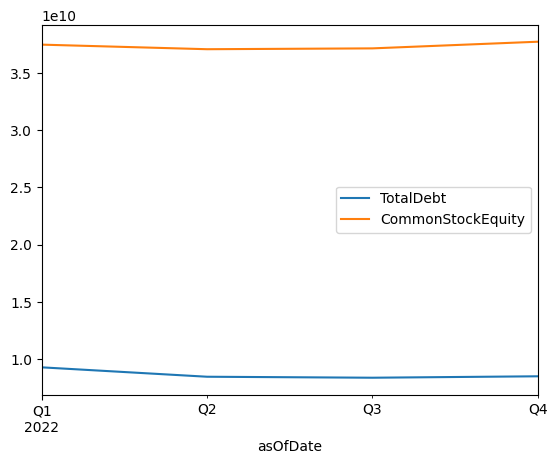

In [15]:
debt_vs_equity.plot();

### Debt/Equity ratio

In [16]:
balance_sheet['TotalDebt/CommonStockEquity']=balance_sheet['TotalDebt']/balance_sheet['CommonStockEquity']

debt_equity_ratio = balance_sheet[['asOfDate', 'TotalDebt/CommonStockEquity']]
debt_equity_ratio = debt_equity_ratio.set_index('asOfDate')

In [17]:
debt_equity_ratio.style.format({
    'TotalDebt/CommonStockEquity': '{:,.2%}'.format
})

,TotalDebt/CommonStockEquity
asOfDate,
2022-03-31 00:00:00,24.73%
2022-06-30 00:00:00,22.78%
2022-09-30 00:00:00,22.51%
2022-12-31 00:00:00,22.49%


In [18]:
debt_equity_ratio.index

DatetimeIndex(['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'], dtype='datetime64[ns]', name='asOfDate', freq=None)

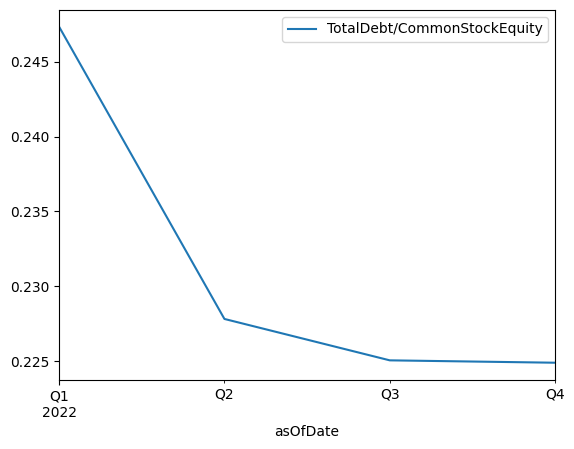

In [19]:
debt_equity_ratio.plot();